In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from time import time
import SHFunctions as shf
import os

    A = shf.MakeStochA(4,6)
    Ss = shf.NewtonPoly(A)
    
    ax = plt.subplot(111)
    ax.semilogy(Ss['errs'],'-o')

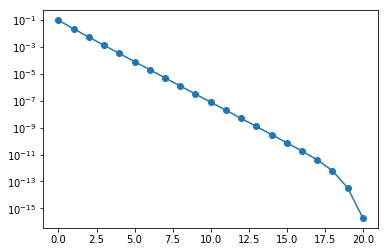

In [2]:
    A = shf.MakeSingularA(8, 4, delta = .000001)
    Ss = shf.NewtonPoly(A)

    ax = plt.subplot(111)
    ax.semilogy(Ss['errs'],'-o')

In [3]:
    # S - X_{i}와 X_{i+1} - X_{i}
    SmX = []
    for X in Ss['Xs']:
        SmX.append(Ss['sol'] - X)

    XmX = []
    for i in range(len(Ss['Xs'])-1):
        XmX.append(Ss['Xs'][i+1] - Ss['Xs'][i])

In [4]:
    # Vectorize
    vSmX = []
    vXmX = []
    for X in SmX:
        vSmX.append(np.reshape(X, X.shape[0]*X.shape[1], order='F'))
    for X in XmX:
        vXmX.append(np.reshape(X, X.shape[0]*X.shape[1], order='F'))
    

In [5]:
    # cos 계산
    cSX = []
    cXX = []
    for i in range(len(vSmX)-1):
        x, y = vSmX[i+1], vSmX[i]
        c = np.dot(x,y) / (nla.norm(x,2)*nla.norm(y,2))
        cSX.append(c)
    for i in range(len(vXmX)-1):
        x, y = vXmX[i+1], vXmX[i]
        c = np.dot(x,y) / (nla.norm(x,2)*nla.norm(y,2))
        cXX.append(c)

c:\users\saibi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [7]:
cXX

[0.8690709692210601,
 0.9999987525131255,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 0.9999999999999999,
 1.0,
 1.0]

    # S - X_{i}와 X_{i+1} - X_{i}의 Frobenius norm 구하기
    nSmX = []
    for X in Ss['Xs']:
        nSmX.append(nla.norm(Ss['sol'] - X,'fro'))

    nXmX = []
    for i in range(len(Ss['Xs'])-1):
        nXmX.append(nla.norm(Ss['Xs'][i+1] - Ss['Xs'][i],'fro'))

    # 그래프로 S - X_{i}와 X_{i+1} - X_{i} 비교
    dXoverdX = [nXmX[i+1] / nXmX[i] for i in range(len(nXmX)-1)]
    dSoverdS = [nSmX[i+1] / nSmX[i] for i in range(len(nSmX)-1)]
    fig, axes = plt.subplots(2,2,figsize=(10, 8))
    axes[0,0].semilogy(nSmX,'-ob')
    axes[0,1].semilogy(nSmX,'-ob')
    axes[0,1].semilogy(nXmX,'-or')
    axes[1,0].plot(dSoverdS,'-ob')
    axes[1,1].plot(dSoverdS,'-ob')
    axes[1,1].plot(dXoverdX, '-or')